In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from glob import glob
import cv2 as cv

In [8]:
assets = glob("assets/*.png")
assets.sort()

In [18]:
test = cv.cvtColor(cv.imread(assets[0], 1), cv.COLOR_BGR2RGB)

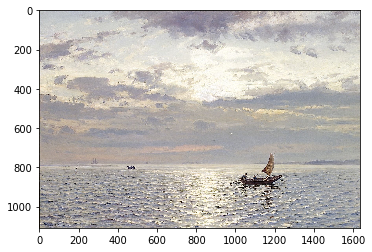

In [19]:
plt.imshow(test)

In [37]:
#code adapted from StackOverflow User thewaywewere: https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv

def image_resize(image, new_width = None, new_height = None, inter = cv.INTER_AREA):
    # initialize the dimensions of the image to be resized and grab the image size
    dimensions = None
    (height, width) = image.shape[:2]

    # if both the width and height are None, then return the original image
    if new_width is None and new_height is None:
        return image

    # check to see if the width is None
    if new_width is None:
        # calculate the ratio of the height and construct the dimensions
        ratio = new_height / float(height)
        dimensions = (int(width * ratio), new_height)

    # otherwise, the height is None
    if new_height is None:
        # calculate the ratio of the width and construct the dimensions
        ratio = new_width / float(width)
        dimensions = (new_width, int(height * ratio))

    # resize the image
    resizedImage = cv.resize(image, dimensions, interpolation = inter)

    # return the resized image
    return resizedImage

In [38]:
testResize = image_resize(test, new_height = 512, inter = cv.INTER_AREA)

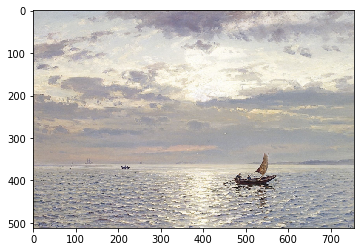

In [39]:
plt.imshow(testResize)

In [40]:
cv.imwrite(assets[0][:-4] + '(X)' + '.png', cv.cvtColor(testResize, cv.COLOR_RGB2BGR))

True

In [43]:
for asset in assets:
    image = cv.cvtColor(cv.imread(asset, 1), cv.COLOR_BGR2RGB)
    resizedImage = image_resize(image, new_height = 512, inter = cv.INTER_AREA)
    cv.imwrite(asset[:-4] + '(Resized)' + asset[-4:], cv.cvtColor(resizedImage, cv.COLOR_RGB2BGR))